In [1]:
# Suppress warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

# Direct access
import s3fs

# datetime
import datetime as dt

# api to read files
import xarray as xr
import h5py

# data process
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
url_parents = 's3://noaa-oar-mlwp-data' # the format of the full url is s3://bucket/yyyy/mm/dd/Radar_id/filename
model = 'FOUR_v100'
yyyy = '2020'
mm = '10'
dd = '01'
url_radar_search = url_parents +'/'+model+'/' +yyyy + '/' + mm + dd + '/' # the format of the full url is s3://bucket/yyyy/mm/dd/Radar_id/filename

In [3]:
url_radar_search

's3://noaa-oar-mlwp-data/FOUR_v100/2020/1001/'

In [4]:
s3 = s3fs.S3FileSystem(anon=True) # connect to s3

In [5]:
url_radar_date = s3.ls(url_radar_search) # list all the files in the folder
url_radar_date[0]  # time: 16:43:47

'noaa-oar-mlwp-data/FOUR_v100/2020/1001/FOUR_v100_GFS_2020100100_f000_f240_06.nc'

In [6]:
# read the url using netcdf4 not xarray
import netCDF4 as nc

aws_nexrad_level2_file = ('s3://'+url_radar_date[0]) 
f = s3.open(aws_nexrad_level2_file, 'rb') # open the file

# read the file
# ncfile = nc.Dataset('dummy', mode='r', memory=f.read()) # read the file
# ncfile.variables.keys() # list all the variables in the file



9 mins for one file using netcdf to read 

In [7]:
import xarray as xr
import dask.array as da

ds = xr.open_dataset(f, chunks={'time': 10, 'lat': 50, 'lon': 50}, engine='h5netcdf') # read the file


50 s while using xarry and dask to read the file parallelly by default (5 workers and 4 cores for each worker)

In [8]:
ds

<xarray.Dataset> Size: 4GB
Dimensions:    (time: 41, longitude: 1440, latitude: 720, zlevel: 5,
                rhlevel: 2, tlevel: 3, windlevel: 4)
Coordinates:
  * time       (time) datetime64[ns] 328B 2020-10-01 ... 2020-10-11
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * zlevel     (zlevel) int32 20B 1000 850 500 250 50
  * rhlevel    (rhlevel) int32 8B 850 500
  * tlevel     (tlevel) int32 12B 850 500 250
  * windlevel  (windlevel) int32 16B 1000 850 500 250
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 170MB dask.array<chunksize=(10, 240, 480), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 170MB dask.array<chunksize=(10, 240, 480), meta=np.ndarray>
    u100       (time, latitude, longitude) float32 170MB dask.array<chunksize=(10, 240, 480), meta=np.ndarray>
    v100       (time, latitude, longitude) float32 170MB dask.array<chunksize=(10, 240, 480), meta=np.ndarray>
    t2         (time, latitude, longitude) float32 170MB dask.array<chunksize=(10, 240, 480), meta=np.ndarray>
    sp         (time, latitude, longitude) float32 170MB dask.array<chunksize=(10, 240, 480), meta=np.ndarray>
    ...         ...
    tcwv       (time, latitude, longitude) float32 170MB dask.array<chunksize=(10, 240, 480), meta=np.ndarray>
    t          (time, tlevel, latitude, longitude) float32 510MB dask.array<chunksize=(10, 1, 240, 480), meta=np.ndarray>
    u          (time, windlevel, latitude, longitude) float32 680MB dask.array<chunksize=(10, 1, 240, 480), meta=np.ndarray>
    v          (time, windlevel, latitude, longitude) float32 680MB dask.array<chunksize=(10, 1, 240, 480), meta=np.ndarray>
    z          (time, zlevel, latitude, longitude) float32 850MB dask.array<chunksize=(10, 1, 240, 480), meta=np.ndarray>
    r          (time, rhlevel, latitude, longitude) float32 340MB dask.array<chunksize=(10, 1, 240, 480), meta=np.ndarray>
Attributes:
    Conventions:           CF-1.8
    version:               1_2023-10-14
    model_name:            FourCastNet
    model_version:         v1
    initialization_model:  GFS
    initialization_time:   2020-10-01T00:00:00
    first_forecast_hour:   6
    last_forecast_hour:    240
    forecast_hour_step:    6
    creation_time:         2023-12-22T17:31:19

Test number of workers and threads

the following setting took about 52 s

In [16]:
# import xarray as xr
# from dask.distributed import Client, LocalCluster

# # Configure the local cluster
# n_workers = 4  # Number of workers
# threads_per_worker = 2  # Number of threads (CPU cores) per worker

# cluster = LocalCluster(n_workers=n_workers, threads_per_worker=threads_per_worker)
# client = Client(cluster)

# ds = xr.open_dataset(f, chunks={'time': 10, 'lat': 50, 'lon': 50}, engine='h5netcdf') # read the file

In [9]:
lon = ds.variables['longitude'][:]
lat = ds.variables['latitude'][:]
t = ds.variables['t'][:]
tlevel = ds.variables['tlevel'][:]
time = ds.variables['time'][:]
t2 = ds.variables['t2'][:]

In [10]:
datetime = pd.to_datetime(time.data, unit='s')
datetime

DatetimeIndex(['2020-10-01 00:00:00', '2020-10-01 06:00:00',
               '2020-10-01 12:00:00', '2020-10-01 18:00:00',
               '2020-10-02 00:00:00', '2020-10-02 06:00:00',
               '2020-10-02 12:00:00', '2020-10-02 18:00:00',
               '2020-10-03 00:00:00', '2020-10-03 06:00:00',
               '2020-10-03 12:00:00', '2020-10-03 18:00:00',
               '2020-10-04 00:00:00', '2020-10-04 06:00:00',
               '2020-10-04 12:00:00', '2020-10-04 18:00:00',
               '2020-10-05 00:00:00', '2020-10-05 06:00:00',
               '2020-10-05 12:00:00', '2020-10-05 18:00:00',
               '2020-10-06 00:00:00', '2020-10-06 06:00:00',
               '2020-10-06 12:00:00', '2020-10-06 18:00:00',
               '2020-10-07 00:00:00', '2020-10-07 06:00:00',
               '2020-10-07 12:00:00', '2020-10-07 18:00:00',
               '2020-10-08 00:00:00', '2020-10-08 06:00:00',
               '2020-10-08 12:00:00', '2020-10-08 18:00:00',
               '2020-10-

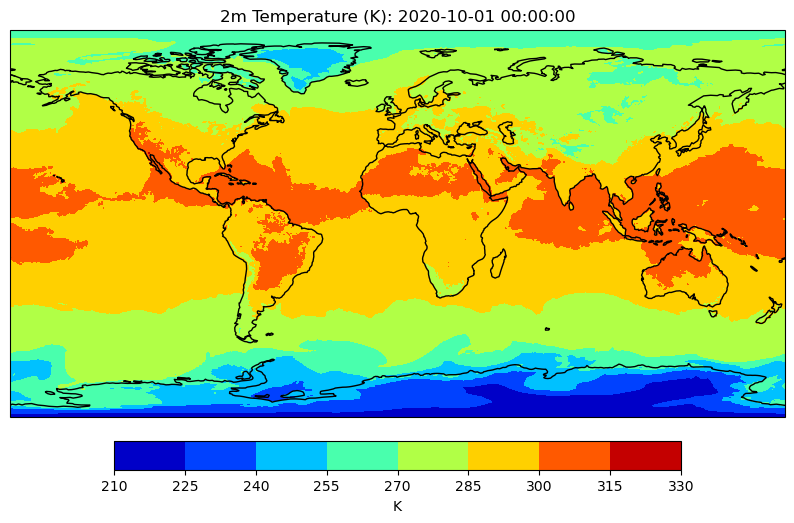

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Create the contour plot with the 'jet' colormap
contour = ax.contourf(lon, lat, t2[0,:,:], cmap='jet', transform=ccrs.PlateCarree())

# Add the colorbar and set the label
cbar = plt.colorbar(contour,orientation='horizontal',
                    # cax=cbar_ax,
                    fraction=0.046, pad=0.04
                    )
cbar.set_label('K')
# set the sized of the colorbar
# cbar.ax.tick_params(labelsize=20)


plt.title(f'2m Temperature (K): {str(datetime[0])}')
plt.show()